<h2 style='text-align:center;font-size:35px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'>CLUSTERING OF IRIS SPECIES<h2>

The data includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'> DATA INSPECTION<h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
iris = pd.read_csv("Iris.csv")

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.drop('Id',axis=1,inplace=True)

In [7]:
print(iris.shape)
print()
print("Rows:",iris.shape[0])
print()
print("Column:",iris.shape[1])

(150, 5)

Rows: 150

Column: 5


In [8]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'> EXPLORATORY DATA ANALYSIS<h2>

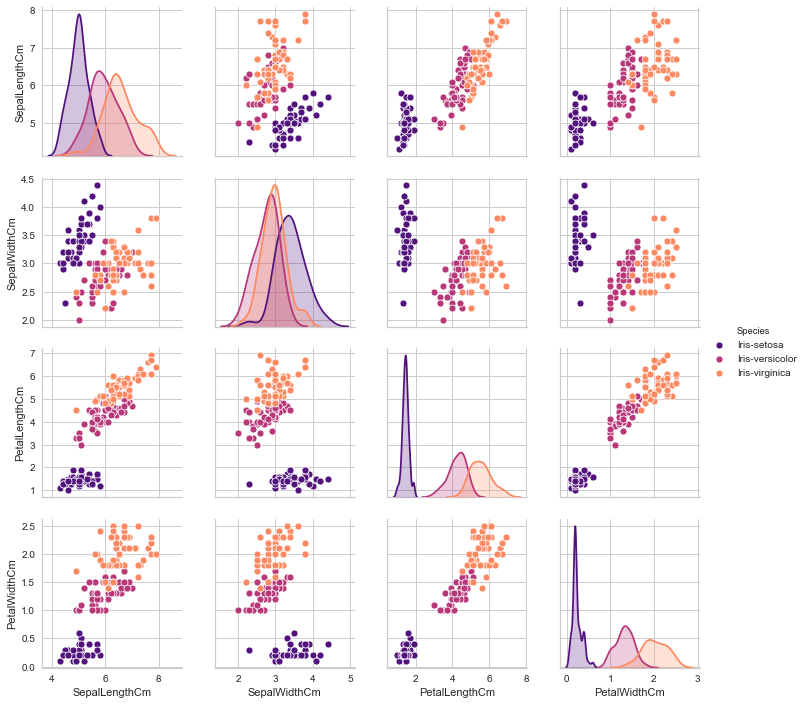

In [10]:
sns.pairplot(iris,hue='Species',palette='magma')

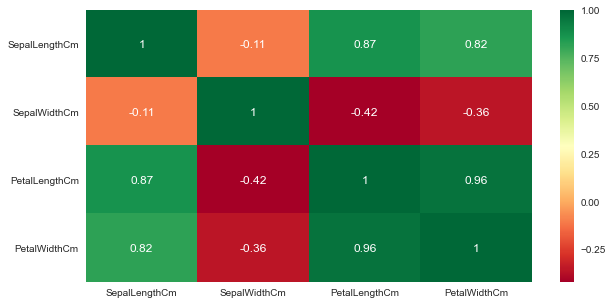

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn')

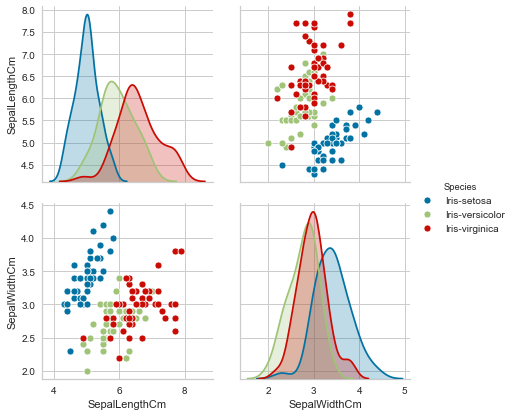

In [12]:
sns.pairplot(iris,vars=["SepalLengthCm",'SepalWidthCm'],hue='Species',size=3)

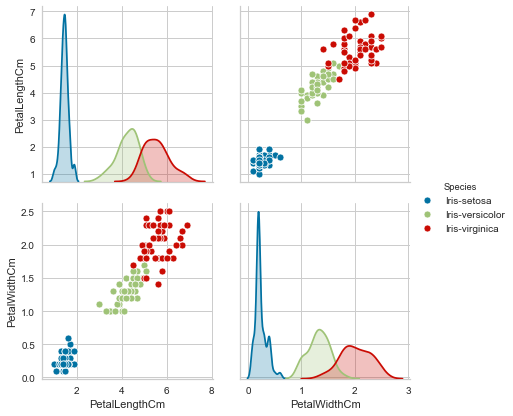

In [13]:
sns.pairplot(iris,vars=["PetalLengthCm",'PetalWidthCm'],hue='Species',size=3)

In [14]:
# extracting the species type
iris['Species'] = iris['Species'].apply(lambda x:x.split('-')[1])

In [15]:
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [16]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
iris.groupby('Species')['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
iris[iris['Species'] == 'setosa'][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [19]:
iris[iris['Species'] == 'versicolor'][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [20]:
iris[iris['Species'] == 'virginica'][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5


<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'>1) K-MEANS CLUSTERING<h2>

In [21]:
iris['Species']= iris['Species'].map({'setosa':0,'virginica':1,'versicolor':2})

<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'>1) ELBOW METHOD<h2>

In [22]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [23]:
# Finding the optimum number of clusters for k-means classification
SSD =[]
K = range(1,11)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(x)
    SSD.append(km.inertia_)

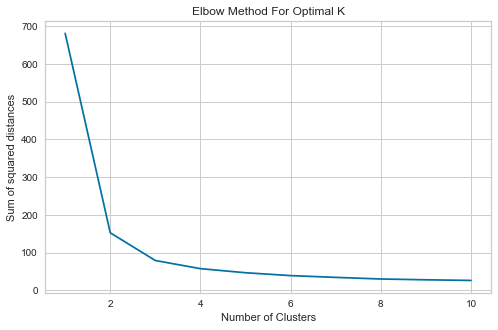

In [24]:
#plotting Elbow
plt.figure(figsize=(8,5))
plt.plot(K, SSD, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

The optimal number of clusters from Elbow Method is 3.

<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'>2) SILHOUETTE SCORE<h2>

In [25]:
KMean= KMeans(n_clusters=3)
KMean.fit(x)
label=KMean.predict(x)

print("Silhouette Score(n=3):",silhouette_score(x, label))

Silhouette Score(n=3): 0.5525919445499757


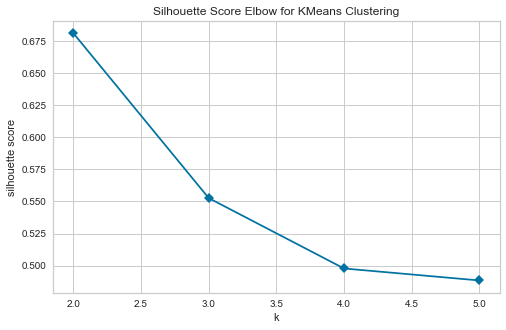

In [26]:
model = KMeans(random_state=123)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
Visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
plt.figure(figsize=(8,5))
# Fit the data and visualize
Visualizer.fit(x)    
Visualizer.poof()

In [27]:
print(KMean.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [28]:
print(KMean.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [29]:
iris["cluster"] = KMean.labels_
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


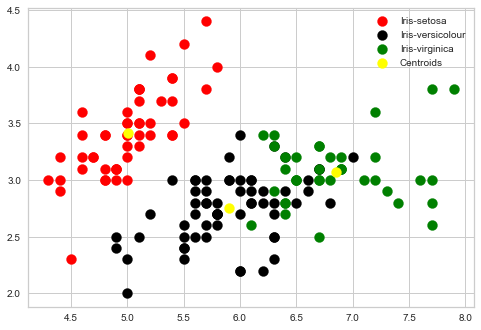

In [30]:
# Visualising the clusters - On the first two columns
plt.scatter(x[label == 0, 0], x[label == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[label == 1, 0], x[label == 1, 1], 
            s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[label == 2, 0], x[label == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(KMean.cluster_centers_[:, 0], KMean.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

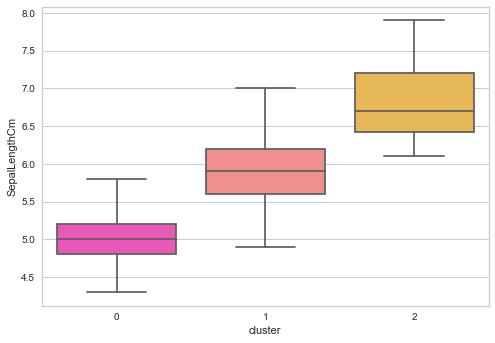

In [31]:
sns.boxplot(y='SepalLengthCm',x='cluster', data=iris,palette='spring')

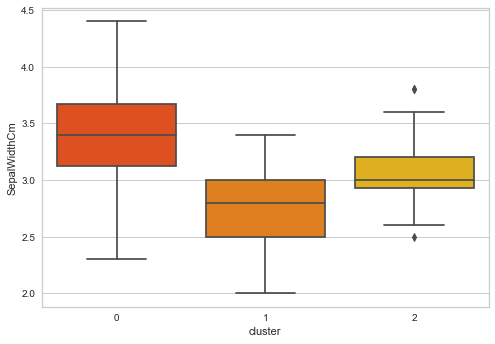

In [32]:
sns.boxplot(y='SepalWidthCm',x='cluster', data=iris,palette='autumn')

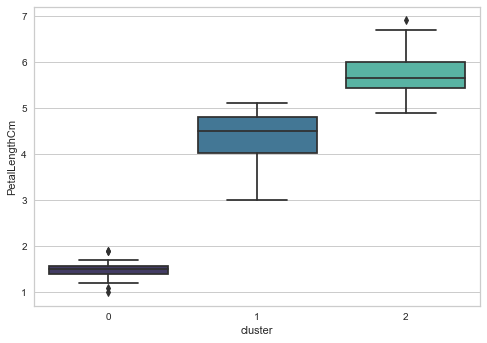

In [33]:
sns.boxplot(y='PetalLengthCm',x='cluster', data=iris,palette='mako')

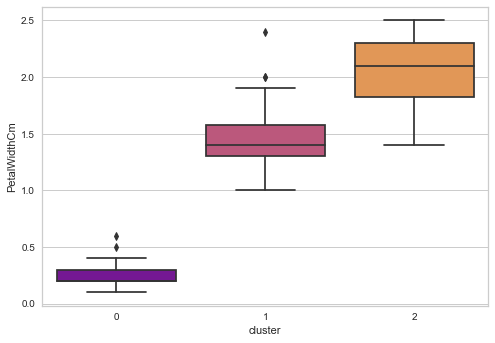

In [34]:
sns.boxplot(y='PetalWidthCm',x='cluster', data=iris,palette='plasma')

<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'>2) HIERARCHICAL CLUSTERING<h2>

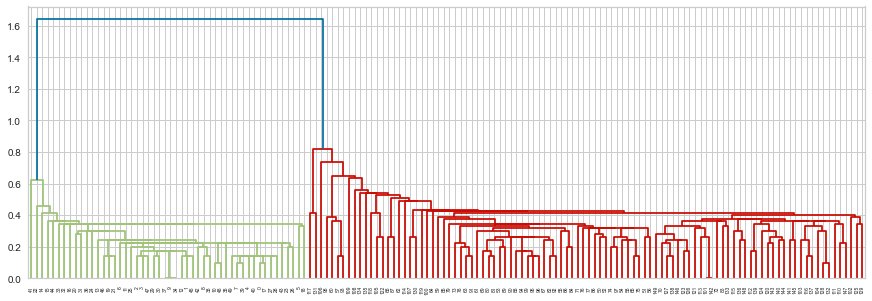

In [35]:
# single linkage
plt.figure(figsize=(15,5))
mergings = linkage(x, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

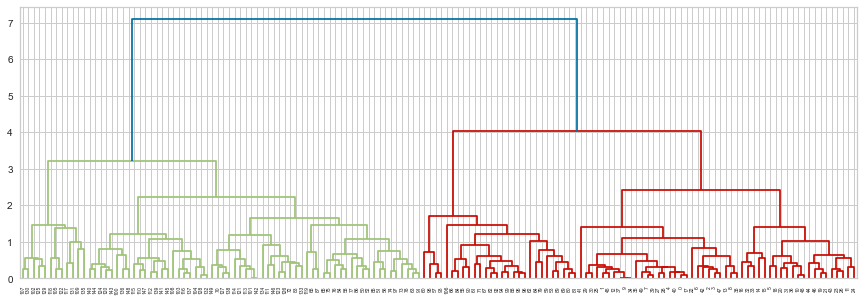

In [36]:
# complete linkage
plt.figure(figsize=(15,5))
mergings = linkage(x, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [37]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<h2 style='text-align:center;font-size:30px;font-family:Verdana;background-color:DARKSLATEGRAY;border:70px;color:white'> CLOSING COMMENTS<h2>

Iris Species has 3 categories:
* Setosa
* Versicolor
* Virginica

<center><img src="https://media1.tenor.com/images/8bf9f0a7ccde164f95ff33306330c7db/tenor.gif?itemid=9530600"><center>